# Practical Lab 3 - Univariate Linear Regression

### The goal of this report is to predict the value of a house based on some independent variables. In this report, we will be using three different variables. The model used in this report for the prediction is a univariate linear regression model.

In [18]:
"""
# Short Report

This report contains data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data

## Getting the Data
[Link to the data source](https://www.kaggle.com/datasets/camnugent/california-housing-prices)
"""


'\n# Short Report\n\nThis report contains data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data\n\n## Getting the Data\n[Link to the data source](https://www.kaggle.com/datasets/camnugent/california-housing-prices)\n'

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
housing = pd.read_csv('./data/housing.csv')
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Extract dependent and independent variables
X = housing[['median_income', 'population', 'households']]  # Independent variables
y = housing['median_house_value']  # Dependent variable

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train linear regression models
models = {}  # Dictionary to store models

In [12]:
# Create and train a model for median income
model_income = LinearRegression()
model_income.fit(X_train[['median_income']], y_train)
models['median_income'] = model_income

In [13]:
# Create and train a model for population
model_population = LinearRegression()
model_population.fit(X_train[['population']], y_train)
models['population'] = model_population

In [15]:
# Create and train a model for number of households
model_households = LinearRegression()
model_households.fit(X_train[['households']], y_train)
models['households'] = model_households


In [16]:
# Evaluate the models
for var, model in models.items():
    print(f"Model for {var}:")
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)
    print("")

Model for median_income:
Coefficient: [41933.84939381]
Intercept: 44459.729169078666

Model for population:
Coefficient: [-2.64712724]
Intercept: 210970.6963447813

Model for households:
Coefficient: [19.337155]
Intercept: 197526.36919714883



# Create three scatter plots using Seaborn

### Scatter plots using Seaborn for Median House Value vs. Median Income

<Axes: xlabel='median_income', ylabel='median_house_value'>

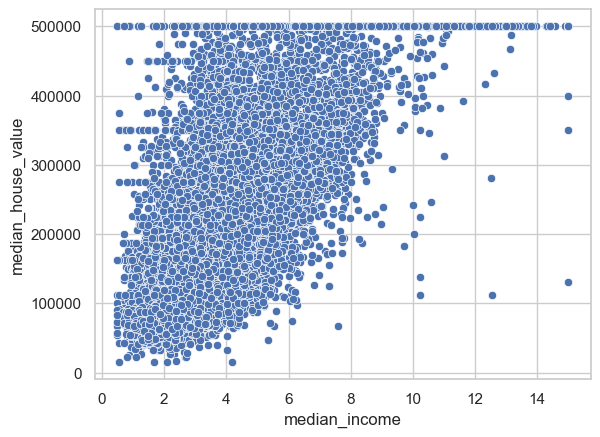

In [20]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)


### Scatter plots using Seaborn for Median House Value vs. Population

<Axes: xlabel='median_income', ylabel='population'>

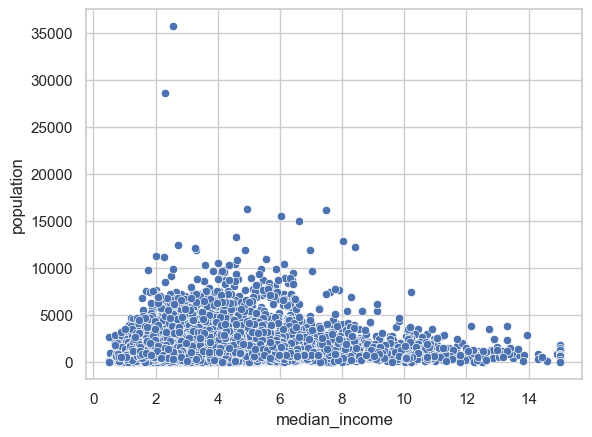

In [22]:
sns.scatterplot(x="median_income", y="population", data=housing)

### Scatter plots using Seaborn for Median House Value vs. Median Household

<Axes: xlabel='median_income', ylabel='households'>

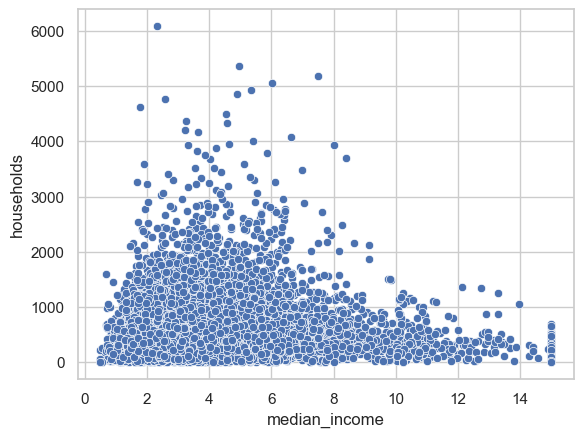

In [24]:
sns.scatterplot(x="median_income", y="households", data=housing)

# 4. Run three linear regressions (fitting) 

In [27]:
# Extracting independent variables and dependent variable
X_median_income = housing[['median_income']]
X_population = housing[['population']]
X_num_households = housing[['households']]
y = housing['median_house_value']

# Create Linear Regression models for each independent variable

# Model 1: Median Income vs. Median House Value
model_median_income = LinearRegression()
model_median_income.fit(X_median_income, y)

# Model 2: Population vs. Median House Value
model_population = LinearRegression()
model_population.fit(X_population, y)

# Model 3: Number of Households vs. Median House Value
model_num_households = LinearRegression()
model_num_households.fit(X_num_households, y)

# Print coefficients and intercepts for each model
print("Model 1: Median Income vs. Median House Value")
print("Coefficient:", model_median_income.coef_)
print("Intercept:", model_median_income.intercept_)
print("")

print("Model 2: Population vs. Median House Value")
print("Coefficient:", model_population.coef_)
print("Intercept:", model_population.intercept_)
print("")

print("Model 3: Number of Households vs. Median House Value")
print("Coefficient:", model_num_households.coef_)
print("Intercept:", model_num_households.intercept_)

Model 1: Median Income vs. Median House Value
Coefficient: [41793.8492019]
Intercept: 45085.5767032679

Model 2: Population vs. Median House Value
Coefficient: [-2.51175277]
Intercept: 210436.26207627333

Model 3: Number of Households vs. Median House Value
Coefficient: [19.87277516]
Intercept: 196928.57716233088


# 5. Summarize in a table, for each of the three models:

In [28]:
# Calculate predictions for each model
y_pred_median_income = model_median_income.predict(X_median_income)
y_pred_population = model_population.predict(X_population)
y_pred_num_households = model_num_households.predict(X_num_households)

# Calculate Mean Squared Error and Mean Absolute Error for each model
mse_median_income = mean_squared_error(y, y_pred_median_income)
mae_median_income = mean_absolute_error(y, y_pred_median_income)

mse_population = mean_squared_error(y, y_pred_population)
mae_population = mean_absolute_error(y, y_pred_population)

mse_num_households = mean_squared_error(y, y_pred_num_households)
mae_num_households = mean_absolute_error(y, y_pred_num_households)

# Create a table to summarize the results
summary_table = pd.DataFrame({
    'Model': ['Median Income vs. Median House Value', 
              'Population vs. Median House Value', 
              'Number of Households vs. Median House Value'],
    'Intercept': [model_median_income.intercept_, 
                   model_population.intercept_, 
                   model_num_households.intercept_],
    'Slope': [model_median_income.coef_[0], 
              model_population.coef_[0], 
              model_num_households.coef_[0]],
    'Mean Squared Error': [mse_median_income, mse_population, mse_num_households],
    'Mean Absolute Error': [mae_median_income, mae_population, mae_num_households]
})

print(summary_table)


                                         Model      Intercept         Slope   
0         Median Income vs. Median House Value   45085.576703  41793.849202  \
1            Population vs. Median House Value  210436.262076     -2.511753   
2  Number of Households vs. Median House Value  196928.577162     19.872775   

   Mean Squared Error  Mean Absolute Error  
0        7.011312e+09         62625.933791  
1        1.330741e+10         91153.820095  
2        1.325778e+10         90802.743243  


# 6. Plot the resulting line on top of the scatter data for each of the three models

Text(0.5, 1.0, 'Median Income vs. Median House Value')

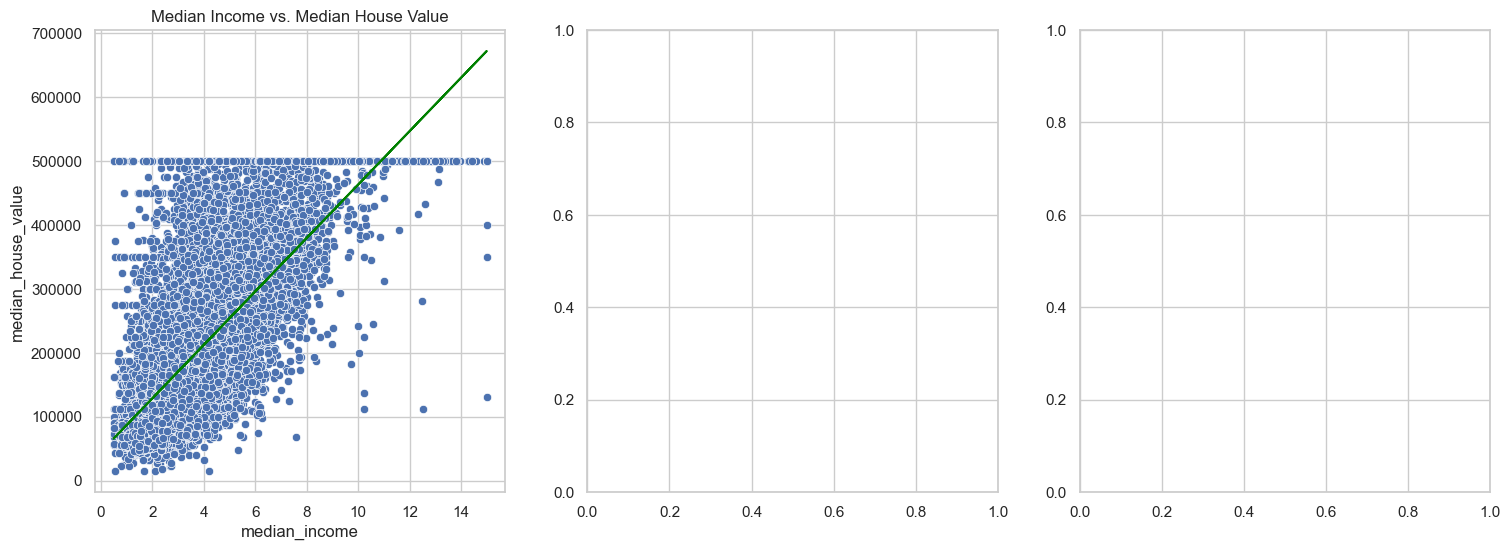

In [35]:
import matplotlib.pyplot as plt

# Create subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Median Income vs. Median House Value
sns.scatterplot(data=housing, x='median_income', y='median_house_value', ax=axes[0])
axes[0].plot(X_median_income, y_pred_median_income, color='green')
axes[0].set_title('Median Income vs. Median House Value')

Text(0.5, 1.0, 'Population vs. Median House Value')

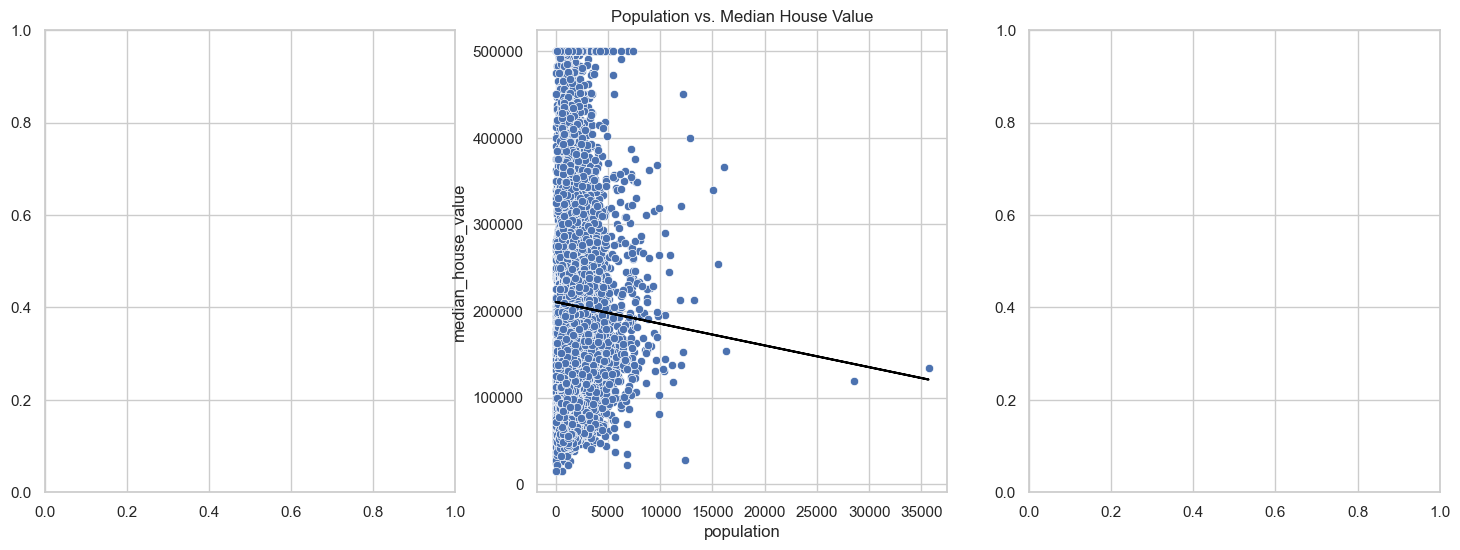

In [47]:
# Plotting Population vs. Median House Value
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=housing, x='population', y='median_house_value', ax=axes[1])
axes[1].plot(X_population, y_pred_population, color='black')
axes[1].set_title('Population vs. Median House Value')

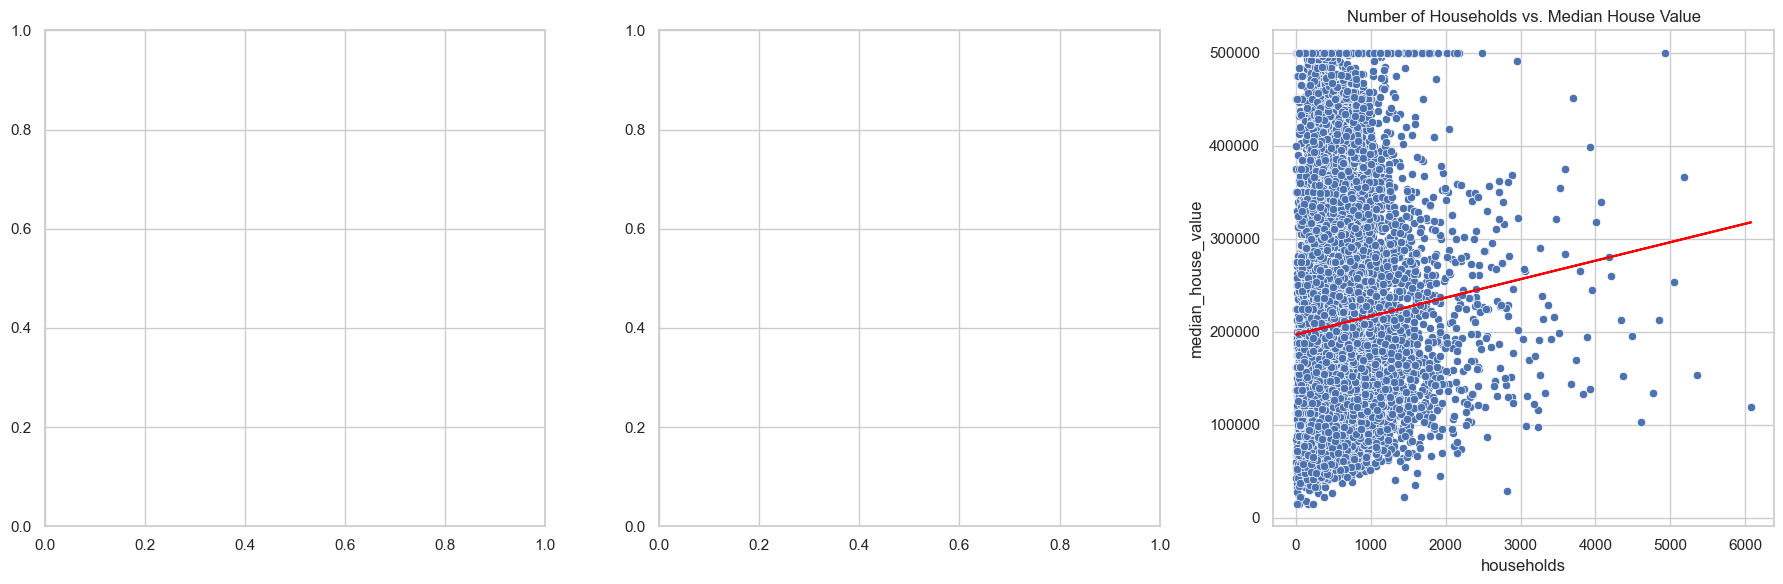

In [46]:
# Plotting Number of Households vs. Median House Value
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=housing, x='households', y='median_house_value', ax=axes[2])
axes[2].plot(X_num_households, y_pred_num_households, color='red')
axes[2].set_title('Number of Households vs. Median House Value')

plt.tight_layout()
plt.show()

In [ ]:
# fit
model.fit(X=train["median_income"])